# Ensemble Learning Techniques and Algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [4]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [8]:
LR=LogisticRegression()
DT=DecisionTreeClassifier(max_depth=10)
SV=SVC()

## Voting Classifier

In [10]:
Vote=VotingClassifier(estimators=[('lr',LR),('dt',DT),('svc',SV)])

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
Vote.fit(xtrain,ytrain)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier(max_depth=10)),
                             ('svc', SVC())])

In [14]:
from sklearn.metrics import accuracy_score,classification_report

In [17]:
for i in (LR,DT,SV,Vote):
    i.fit(xtrain,ytrain)
    ypred=i.predict(xtest)
    print(i,accuracy_score(ytest,ypred))
    
#print(i.__class__.__name__, accuracy_score(ytest, y_pred))

LogisticRegression() 0.7659002687369364
DecisionTreeClassifier(max_depth=10) 0.8148701104807405
SVC() 0.7414153478650344
VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier(max_depth=10)),
                             ('svc', SVC())]) 0.7826216781128695


## Bagging

In [18]:
from sklearn.ensemble import BaggingClassifier

In [19]:
B=BaggingClassifier(LR,n_estimators=15)

In [20]:
B.fit(xtrain,ytrain)

BaggingClassifier(estimator=LogisticRegression(), n_estimators=15)

In [21]:
ypred=B.predict(xtest)

In [22]:
accuracy_score(ytest,ypred)

0.7670946551209317

## Random forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
RF=RandomForestClassifier().fit(xtrain,ytrain)

In [26]:
ypred=RF.predict(xtest)

In [27]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1760
           1       0.81      0.88      0.84      1589

    accuracy                           0.84      3349
   macro avg       0.84      0.85      0.84      3349
weighted avg       0.85      0.84      0.84      3349



In [28]:
accuracy_score(ytest,ypred)

0.8435353836966258

## Hyperparameter tuning

In [30]:
RF=RandomForestClassifier(n_estimators=200,max_features=5,criterion='entropy').fit(xtrain,ytrain)
ypred=RF.predict(xtest)
print(classification_report(ytest,ypred))
accuracy_score(ytest,ypred)

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1760
           1       0.82      0.88      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



0.8507017020005972

## Grid Search

In [34]:
params={'criterion':['gini','entropy'],
       'n_estimators':[150,200],
        'max_features':[5,10]
        }

In [35]:
GS=GridSearchCV(RandomForestClassifier(),param_grid=params)

In [36]:
GS.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [5, 10], 'n_estimators': [150, 200]})

In [37]:
GS.best_estimator_

RandomForestClassifier(criterion='entropy', max_features=5, n_estimators=150)

In [38]:
GSbest=GS.predict(xtest)

In [39]:
accuracy_score(ytest,GSbest)

0.8512988951925948

In [40]:
print(classification_report(ytest,GSbest))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1760
           1       0.82      0.88      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



In [41]:
from sklearn.metrics import confusion_matrix

In [46]:
CM=confusion_matrix(ytest,GSbest)
CM

array([[1454,  306],
       [ 192, 1397]], dtype=int64)

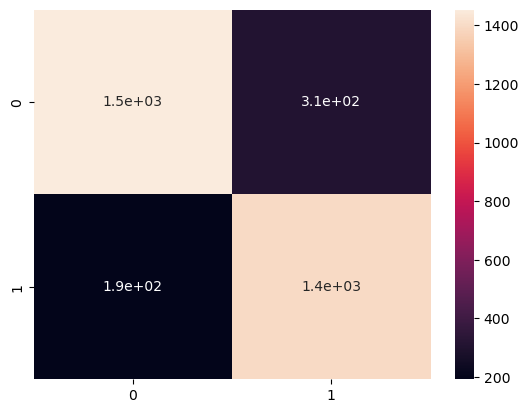

In [55]:
#plt.plot(confusion_matrix=CM)
sns.heatmap(CM,annot=True)
plt.show()
